# Derivative of a Function

Lets take the derivative of a typical function.

$$f(x) = 0.2+25x-200x^2+675x^3-900x^4+400x^5$$

## Symbolically with sympy

### Import sympy and create symbol and function

In [3]:
import sympy as sp
x = sp.Symbol('x')
f = 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5
f

400*x**5 - 900*x**4 + 675*x**3 - 200*x**2 + 25*x + 0.2

### Find differential symbolically

In [4]:
f.diff()

2000*x**4 - 3600*x**3 + 2025*x**2 - 400*x + 25

In [5]:
sp.diff(0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5)

2000*x**4 - 3600*x**3 + 2025*x**2 - 400*x + 25

### Evaluate for specific value (2.0)

In [9]:
ff = sp.lambdify(x,f)
ff(2)
df = sp.lambdify(x,f.diff())
df(2.)

10525.0

### Plot

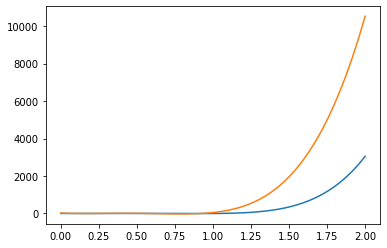

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,2)
plt.plot(x,ff(x),x,df(x))

## Difference Methods

### Forward

In [13]:
def f_f_prime(x,step): return (ff(x+step)-ff(x))/step

In [17]:
f_f_prime(2.,.000001)

10525.014253744303

### Central 

In [15]:
def f_c_prime(x,step): return (ff(x+step)-ff(x-step))/(2*step)

In [16]:
f_c_prime(2.,.000001)

10525.000001507578

### Backward

In [18]:
def f_b_prime(x,step): return (ff(x)-ff(x-step))/step

In [19]:
f_b_prime(2.,.000001)

10524.985749270854

## Real World Derivative Problem

### Oil tanker loading
The following data were collected when a large oil tanker was loading:

|  $t,min$         | 0   | 10  | 20   | 30   | 45   | 60   | 75   |
|------------------|-----|-----|------|------|------|------|------|
|  $V,10^6barrels$ | 0.4 | 0.7 | 0.77 | 0.88 | 1.05 | 1.17 | 1.35 |

Calculate the flow rate $Q$ (that is, $dV/ydt$) for each time to the order.

There is no Function, so utilize the values.

#### Create arrays

In [20]:
t = [0.,10.,20.,30.,45.,60.,75.]
V = [0.4,0.7,0.77,0.88,1.05,1.17,1.35]

#### Plot values

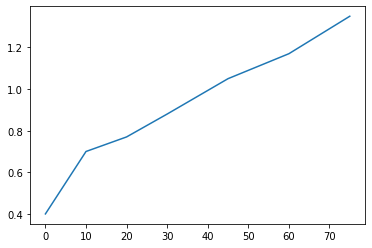

In [21]:
plt.plot(t,V)

#### Create a function to calculate the central difference

In [22]:
def Q(t0,t1,V0,V1): return (V1-V0)/(t1-t0)

#### Create loop to evaluate at each time step

In [23]:
n = 0 
while n < len(t)-1:
    print('Time:',t[n],'Q;',Q(t[n],t[n+1],V[n],V[n+1]))
    n +=1

Time: 0.0 Q; 0.029999999999999992
Time: 10.0 Q; 0.007000000000000006
Time: 20.0 Q; 0.011
Time: 30.0 Q; 0.011333333333333336
Time: 45.0 Q; 0.007999999999999991
Time: 60.0 Q; 0.01200000000000001


# Integration

## Find the integral of
$$f(x) = 0.2+25x-200x^2+675x^3-900x^4+400x^5$$



#### Create the function

In [24]:
def f(x): return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

#### Create the trapezoidal function

In [26]:
def Int(a,b): return (b-a)*(f(a)+f(b))/2

#### Single application

In [27]:
Int(0,0.8)

0.1728000000000225

#### Double Application

#### Quad application

### Simpsons Rule

#### Single Application

#### Double Application

### Simpsons 3/8 Rule

#### Offset solution

### Symbolic solution

In [29]:
import sympy as sp

In [30]:
x = sp.symbols('x')

In [31]:
express = 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

In [32]:
f = sp.lambdify(x,express)

In [33]:
def Err(a,b): return -(b-a)**5/2880*sp.diff(express,x,x,x,x).evalf(subs={x: (a+b)/2})

In [34]:
Err(0,0.8)

0.273066666666667

In [35]:
sp.integrate(express,x).evalf(subs={x: .8})-sp.integrate(express,x).evalf(subs={x: 0})

1.64053333333333

### Quadrature

In [36]:
frm scipy integrate import quad
quad(f,0,0.8)

SyntaxError: invalid syntax (<ipython-input-36-6792fa3d8635>, line 1)

### Solving for a transendental function

$$f(x) = e^{-x}sin(3x)$$

Solve from $x=0$ to $x=2\pi$

#### Using Integrate function in scipy

In [605]:
nt_x = sp.integrate(sp.exp(-x)*sp.sin(3.0*x),(x,0,2*np.pi))

In [606]:
nt_x

0.299439767180488

#### Using Quadrature

In [630]:
def f(x): return np.exp(-x)*np.sin(3.0*x)
i2 = quad(f,0,2*np.pi)
i2[0]

0.29943976718048754

# Homework

## (1) Falling Object (Derivative)

An object is falling and it's velocity is measured at different time steps as follows.

|$time,sec$|0|2|4|6|8|10|12|
|----------|-|-|-|-|-|--|--|
|$Velocity,m/s$|0|16.5|27.8|35.7|41.1|44.9|47.4|53.3|

Calculate the acceleration at each time step using a forward difference. 

## (2) Falling Object (Integral)

Using the velocity table above, calculate the final location (distance travled) of the falling object at 12 seconds. (It starts at zero and is falling) Use the trapezoidal method at least.